## Multiple Linear Regression - Predicting Profit of 50Startups

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
startup_df=pd.read_csv('50_Startups.csv')

### EDA

In [3]:
startup_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startup_df.shape

(50, 5)

### Check for Duplicates and empty rows

In [6]:
startup_df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
startup_df.duplicated().sum()

0

### Check for Outliers

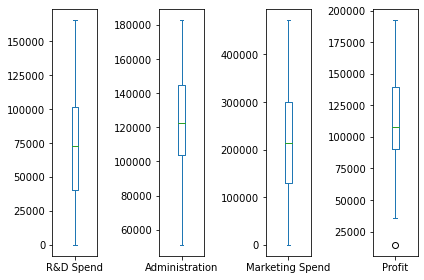

In [8]:
startup_df.plot(kind='box',subplots=True)
plt.tight_layout();

### Corelation analysis

In [9]:
corelation=np.round(startup_df.corr(),4)
corelation

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.0000,0.2420,0.7242,0.9729
Administration,0.2420,1.0000,-0.0322,0.2007
Marketing Spend,0.7242,-0.0322,1.0000,0.7478
Profit,0.9729,0.2007,0.7478,1.0000


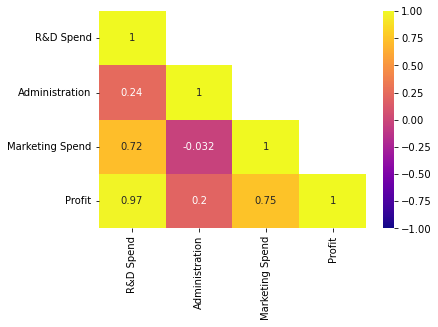

In [10]:
sns.heatmap(data=corelation,vmax=1,vmin=-1,annot=True,mask=np.triu(corelation,1),cmap='plasma');

### Model Building Default - Without any changes for data

In [11]:
from statsmodels.formula.api import ols
startup_df=startup_df.rename({"R&D Spend":"RD","Administration":"AD","Marketing Spend":"MS","State":"ST","Profit":"PT"},axis=1)
formula='PT ~ RD+AD+MS+ST'
model=ols(formula=formula,data=startup_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PT   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           1.34e-27
Time:                        11:38:18   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.013e+04   6884.820      7.

In [12]:
startup_df.head()

,RD,AD,MS,ST,PT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [13]:
model.params

Intercept         50125.343832
ST[T.Florida]       198.788793
ST[T.New York]      -41.887019
RD                    0.806023
AD                   -0.027004
MS                    0.026980
dtype: float64

In [14]:
model.pvalues

Intercept         4.444178e-09
ST[T.Florida]     9.532429e-01
ST[T.New York]    9.897941e-01
RD                2.578772e-21
AD                6.077373e-01
MS                1.226769e-01
dtype: float64

In [15]:
model.rsquared

0.9507524843355148

### Check for homoscedascity equatity of variance - residulas vs fitted values

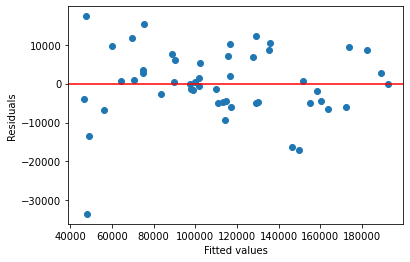

In [16]:
plt.scatter(model.fittedvalues,model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(y=0,color='r',linestyle='-');

### Check for normality of errors or residuals -qqplot

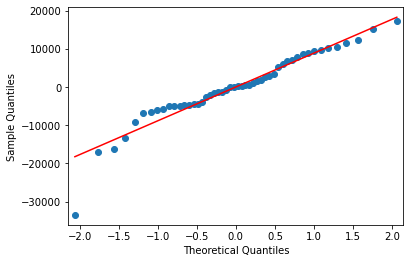

In [17]:
from statsmodels.api import qqplot
qqplot(model.resid,line='s');

In [18]:
index_no=np.where(model.resid<-30000)
index_no

(array([49], dtype=int64),)

In [19]:
startup_df[startup_df.index.isin([49])]

,RD,AD,MS,ST,PT
49,0.0,116983.8,45173.06,California,14681.4


In [20]:
startup_df_qqplot_residual=startup_df.drop(index_no[0],axis=0).reset_index(drop=True)

In [21]:
startup_df_qqplot_residual.shape

(49, 5)

In [22]:
formula='PT ~ RD+AD+MS+ST'

In [23]:
model_qqplot=ols(formula=formula,data=startup_df_qqplot_residual).fit()

In [24]:
model_qqplot.params

Intercept         53379.232166
ST[T.Florida]     -1564.224245
ST[T.New York]    -1954.017701
RD                    0.783589
AD                   -0.022022
MS                    0.025821
dtype: float64

In [25]:
model_qqplot.pvalues

Intercept         9.794946e-12
ST[T.Florida]     5.848984e-01
ST[T.New York]    4.815045e-01
RD                1.898629e-23
AD                6.162761e-01
MS                7.828496e-02
dtype: float64

In [26]:
model_qqplot.rsquared

0.9618082858227786

## Influence Plot - this shows which observatoins or rows which are having high influence on the models prediction

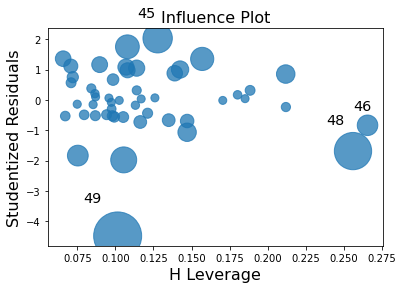

In [27]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model);

In [28]:
startup_df_Influence_plot=startup_df.drop([48,46,45,49],axis=0).reset_index(drop=True)

In [29]:
startup_df_Influence_plot.shape

(46, 5)

In [30]:
formula='PT ~ RD+AD+MS+ST'

In [31]:
model_InfluencePlot=ols(formula=formula,data=startup_df_Influence_plot).fit()

In [32]:
model_InfluencePlot.params

Intercept         57259.700904
ST[T.Florida]      -912.428437
ST[T.New York]    -1744.998960
RD                    0.773029
AD                   -0.052036
MS                    0.028312
dtype: float64

In [33]:
model_InfluencePlot.pvalues

Intercept         5.603723e-12
ST[T.Florida]     7.323492e-01
ST[T.New York]    5.131145e-01
RD                1.346735e-21
AD                2.434593e-01
MS                6.313335e-02
dtype: float64

In [34]:
model_InfluencePlot.rsquared

0.9629967080989382

### Cooks Distance

In [35]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance
c

array([7.67941282e-06, 3.96002384e-03, 2.78948395e-02, 2.35705108e-02,
       1.40231490e-02, 1.17098970e-02, 2.49314176e-03, 4.16542624e-03,
       7.29467176e-05, 6.31415598e-03, 2.21391699e-02, 1.93512168e-02,
       2.13263552e-02, 7.40092001e-03, 7.20165958e-02, 4.34157410e-02,
       1.57591120e-02, 4.33058862e-03, 3.43997076e-03, 3.28909738e-02,
       7.03247647e-04, 1.17002661e-02, 3.52541534e-03, 3.68801928e-04,
       5.07030667e-03, 4.16365620e-03, 5.79414020e-03, 3.25030423e-02,
       1.07438091e-03, 1.14685871e-04, 2.67092819e-05, 4.26003185e-06,
       6.55180125e-04, 2.69550649e-04, 2.09894518e-02, 8.32171521e-03,
       5.92471519e-02, 7.19280440e-05, 5.58017593e-02, 1.60830329e-03,
       2.27122555e-03, 2.19513492e-03, 1.66164967e-04, 2.33988898e-02,
       1.16697070e-04, 9.43947846e-02, 4.23233340e-02, 4.48153392e-03,
       1.56376134e-01, 2.63959436e-01])

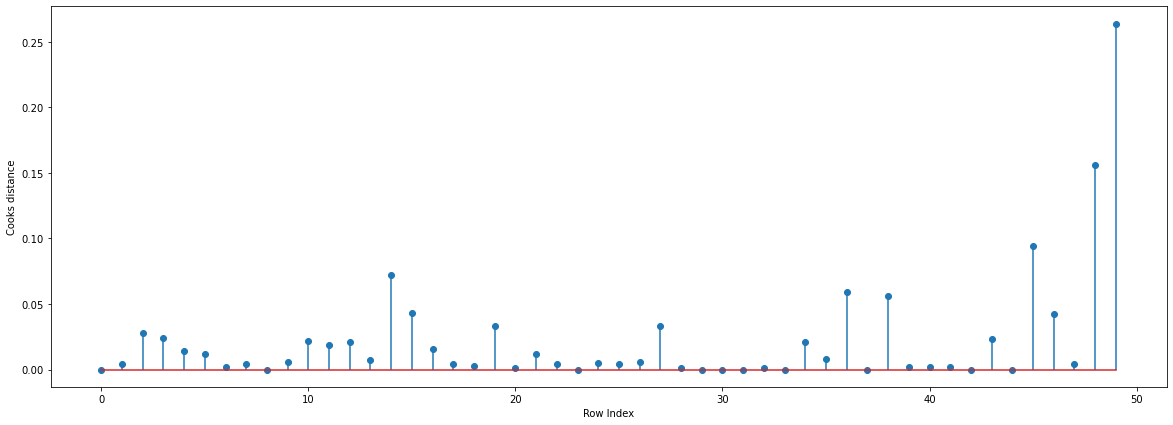

In [36]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup_df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks distance');

In [37]:
4/len(startup_df)

0.08

In [38]:
np.where(c>0.08)[0] 

array([45, 48, 49], dtype=int64)

In [39]:
startup_df.shape

(50, 5)

In [40]:
startup_df_cooks_distance=startup_df.drop(np.where(c>0.08)[0],axis=0).reset_index(drop=True)

In [41]:
startup_df_cooks_distance.shape

(47, 5)

In [42]:
formula='PT ~ RD+AD+MS+ST'

In [43]:
model_cooks_distance=ols(formula=formula,data=startup_df_cooks_distance).fit()

In [44]:
model_cooks_distance.params

Intercept         58121.898873
ST[T.Florida]     -1428.957602
ST[T.New York]    -1812.302917
RD                    0.796070
AD                   -0.061155
MS                    0.021292
dtype: float64

In [45]:
model_cooks_distance.pvalues

Intercept         2.700935e-12
ST[T.Florida]     5.898337e-01
ST[T.New York]    4.993466e-01
RD                2.832461e-24
AD                1.678341e-01
MS                1.282088e-01
dtype: float64

In [46]:
model_cooks_distance.rsquared

0.9645358420492033

### VIF- Variance Inflation Factor- Check for multicollinearity btw independent features

In [47]:
startup_df['ST'].value_counts()

New York      17
California    17
Florida       16
Name: ST, dtype: int64

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
label_encoder=LabelEncoder()

In [50]:
startup_df_VIF=startup_df.copy()

In [51]:
startup_df_VIF["ST"]=label_encoder.fit_transform(startup_df_VIF["ST"])

In [52]:
startup_df_VIF.head()

,RD,AD,MS,ST,PT
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [54]:
startup_df_VIF_formodel=startup_df_VIF.drop('PT',axis=1)

In [55]:
startup_df_VIF_formodel.head()

,RD,AD,MS,ST
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [56]:
vif=pd.DataFrame()
vif['VIFFactor']=[variance_inflation_factor(startup_df_VIF_formodel.values,i) for i in range(startup_df_VIF_formodel.shape[1])]
vif['Features']=startup_df_VIF_formodel.columns
vif


,VIFFactor,Features
0,8.386322,RD
1,4.815916,AD
2,7.674608,MS
3,2.382637,ST


### Since all the VIF values of independent features are less than 10 there is no high multicollinearity btw the independent features.

## RSQUARE TABLE

In [57]:
Rsquare=pd.DataFrame()
Rsquare["Models"]=["CooksDistance","InfluencePlot","QQPlot","Default"]
Rsquare["RSQUAREValue"]=[model_cooks_distance.rsquared,
                         model_InfluencePlot.rsquared,
                         model_qqplot.rsquared,
                         model.rsquared]
Rsquare

,Models,RSQUAREValue
0,CooksDistance,0.964536
1,InfluencePlot,0.962997
2,QQPlot,0.961808
3,Default,0.950752


### Model Predictions-Sample New Data

In [58]:
#data.append({'RD':165349.20,"AD":136897.80,"MS":471784.10,"ST":"New York"},ignore_index=True)

In [59]:
data=pd.DataFrame({'RD':165349.20,"AD":136897.80,"MS":471784.10,"ST":"New York"},index=[0])

In [60]:
data

,RD,AD,MS,ST
0,165349.2,136897.8,471784.1,New York


In [61]:
model.predict(data)

0    192390.571364
dtype: float64

In [62]:
model_qqplot.predict(data)

0    190158.286186
dtype: float64

In [63]:
model_InfluencePlot.predict(data)

0    189568.101575
dtype: float64

In [64]:
model_cooks_distance.predict(data)

0    189612.190337
dtype: float64

### RMSE Method

In [65]:
from sklearn.metrics import mean_squared_error

In [66]:
startup_df=startup_df.rename({"R&D Spend":"RD","Administration":"AD","Marketing Spend":"MS","State":"ST","Profit":"PT"},axis=1)

In [67]:
startup_df.head()

,RD,AD,MS,ST,PT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [68]:
predictions_default=model.predict(startup_df)
rmse_default=mean_squared_error(startup_df['PT'],predictions_default,squared=False)
rmse_default

8854.761029414496

In [69]:
predictions_qqplot=model_qqplot.predict(startup_df_qqplot_residual)
rmse_qqplot=mean_squared_error(startup_df_qqplot_residual['PT'],predictions_qqplot,squared=False)
rmse_qqplot

7383.180758323902

In [70]:
predictions_influenceplot=model_InfluencePlot.predict(startup_df_Influence_plot)
rmse_influenceplot=mean_squared_error(startup_df_Influence_plot['PT'],predictions_influenceplot,squared=False)
rmse_influenceplot

6737.649026104342

In [71]:
predictions_cooksdistance=model_cooks_distance.predict(startup_df_cooks_distance)
rmse_cooksdistance=mean_squared_error(startup_df_cooks_distance['PT'],predictions_cooksdistance,squared=False)
rmse_cooksdistance

6787.15571961047

In [72]:
RMSE=pd.DataFrame()
RMSE["Models"]=["InfluencePlot","CooksDistance","QQPlot","Default",]
RMSE["RMSEValues"]=[rmse_influenceplot,rmse_cooksdistance,rmse_qqplot,rmse_default]
RMSE

,Models,RMSEValues
0,InfluencePlot,6737.649026
1,CooksDistance,6787.155720
2,QQPlot,7383.180758
3,Default,8854.761029


### So the best model to choose is between Influence Plot or CooksDistance Model since it has least RMSE value compared to others and it is able to explain 96.45% and 96.29% of the variability in the Target variable by the independent variables.

# END OF PROBLEM1

## Multiple Linear Regression - Predicting Price of Toyota Corolla


In [73]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df=pd.read_csv("ToyotaCorolla.csv",encoding='latin1')

In [75]:
df_toyota=df.iloc[:,[2,3,6,8,12,13,15,16,17]]

In [76]:
df_toyota

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


### EDA

In [77]:
df_toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [78]:
df_toyota.shape

(1436, 9)

### Check for Duplicates and empty rows

In [79]:
df_toyota.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [80]:
df_toyota.duplicated().sum()

1

In [81]:
df_toyota.drop_duplicates(inplace=True)

C:\Users\Sachin Ganapathy\Anaconda3\envs\tf\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [82]:
df_toyota=df_toyota.reset_index(drop=True)

In [83]:
df_toyota.duplicated().sum()

0

### Check for Outliers

C:\Users\Sachin Ganapathy\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


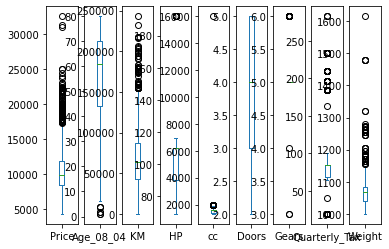

In [84]:
df_toyota.plot(kind='box',subplots=True)
plt.tight_layout();

In [85]:
df_toyota.rename({"Price":"PR","Age_08_04":"Age","KM":"km","HP":"hp","cc":"CC","Doors":"DOORS",
                  "Gears":"GEARS","Quarterly_Tax":"QTax","Weight":"WT"},axis=1,inplace=True)

In [86]:
df_toyota_NOUT=df_toyota.copy()

In [87]:
for i in range(df_toyota_NOUT.shape[1]):
    if df_toyota_NOUT.columns[i]=='PR':
        pass
    else:
        q3=df_toyota_NOUT[df_toyota_NOUT.columns[i]].quantile(0.75)
        q1=df_toyota_NOUT[df_toyota_NOUT.columns[i]].quantile(0.25)
        IQR=q3-q1
        UB=q3+(1.5*IQR)
        LB=q1-abs(1.5*IQR)
        df_toyota_NOUT[df_toyota_NOUT.columns[i]]=np.where(df_toyota_NOUT[df_toyota_NOUT.columns[i]]>UB,
                                                                 UB,df_toyota_NOUT[df_toyota_NOUT.columns[i]])
        df_toyota_NOUT[df_toyota_NOUT.columns[i]]=np.where(df_toyota_NOUT[df_toyota_NOUT.columns[i]]<LB,
                                                                 LB,df_toyota_NOUT[df_toyota_NOUT.columns[i]])

C:\Users\Sachin Ganapathy\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


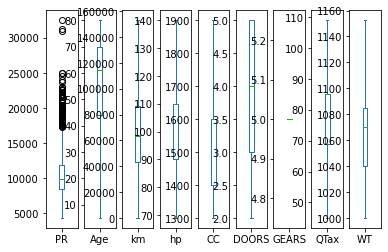

In [88]:
df_toyota_NOUT.plot(kind='box',subplots=True)
plt.tight_layout();

In [89]:
from matplotlib.cbook import boxplot_stats

In [90]:
boxplot_stats(df_toyota_NOUT)

[{'mean': 10720.915679442509,
  'iqr': 3500.0,
  'cilo': 9754.941979648513,
  'cihi': 10045.058020351487,
  'whishi': 17200.0,
  'whislo': 4350.0,
  'fliers': array([18600., 21500., 20950., 19950., 19600., 21500., 22500., 22000.,
         22750., 17950., 17495., 17950., 19000., 17950., 17950., 21950.,
         17950., 20500., 21950., 18950., 18750., 17950., 17950., 18950.,
         22250., 18950., 19950., 18750., 18450., 18950., 17250., 17950.,
         17450., 17950., 21950., 22250., 19950., 18900., 19950., 18750.,
         17450., 18990., 18500., 18500., 19450., 18800., 17450., 17950.,
         32500., 31000., 31275., 24950., 22950., 24990., 21950., 17900.,
         19250., 22250., 18950., 19950., 18950., 21750., 17950., 18450.,
         23000., 19900., 23950., 19950., 18500., 18950., 20500., 24500.,
         19450., 20950., 19950., 18450., 19500., 21750., 19500., 18900.,
         19750., 19750., 18950., 20750., 19600., 19500., 17650., 19950.,
         19950., 20950., 20500., 17795.,

### Corelation Analysis


In [91]:
corelation=np.round(df_toyota.corr(),4)
corelation

,PR,Age,km,hp,CC,DOORS,GEARS,QTax,WT
PR,1.0000,-0.8763,-0.5694,0.3141,0.1244,0.1836,0.0638,0.2115,0.5759
Age,-0.8763,1.0000,0.5046,-0.1553,-0.0965,-0.1469,-0.0056,-0.1933,-0.4665
km,-0.5694,0.5046,1.0000,-0.3329,0.1038,-0.0352,0.0149,0.2833,-0.0240
hp,0.3141,-0.1553,-0.3329,1.0000,0.0352,0.0918,0.2096,-0.3023,0.0871
CC,0.1244,-0.0965,0.1038,0.0352,1.0000,0.0793,0.0147,0.3060,0.3351
DOORS,0.1836,-0.1469,-0.0352,0.0918,0.0793,1.0000,-0.1601,0.1074,0.3017
GEARS,0.0638,-0.0056,0.0149,0.2096,0.0147,-0.1601,1.0000,-0.0051,0.0212
QTax,0.2115,-0.1933,0.2833,-0.3023,0.3060,0.1074,-0.0051,1.0000,0.6220
WT,0.5759,-0.4665,-0.0240,0.0871,0.3351,0.3017,0.0212,0.6220,1.0000


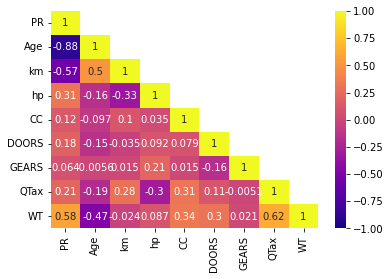

In [92]:
sns.heatmap(data=corelation,vmax=1,vmin=-1,annot=True,mask=np.triu(corelation,1),cmap='plasma');

### Model Building Default - Without any changes for data

In [93]:
df_toyota.head()

,PR,Age,km,hp,CC,DOORS,GEARS,QTax,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [94]:
from statsmodels.formula.api import ols
formula='PR ~ Age+km+hp+CC+DOORS+GEARS+QTax+WT'
model_toyota=ols(formula=formula,data=df_toyota).fit()
print(model_toyota.summary())

                            OLS Regression Results                            
Dep. Variable:                     PR   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:38:23   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.0

In [95]:
model_toyota.params

Intercept   -5472.540368
Age          -121.713891
km             -0.020737
hp             31.584612
CC             -0.118558
DOORS          -0.920189
GEARS         597.715894
QTax            3.858805
WT             16.855470
dtype: float64

In [96]:
model_toyota.pvalues

Intercept     1.113392e-04
Age          1.879217e-288
km            1.994713e-56
hp            5.211155e-28
CC            1.882393e-01
DOORS         9.816443e-01
GEARS         2.452430e-03
QTax          3.290363e-03
WT            1.031118e-51
dtype: float64

In [97]:
model_toyota.rsquared

0.8625200256947

### Model Building - Without any Outliers

In [98]:
from statsmodels.formula.api import ols
formula='PR ~ Age+km+hp+CC+DOORS+GEARS+QTax+WT'
model_OUT=ols(formula=formula,data=df_toyota_NOUT).fit()
print(model_OUT.summary())

                            OLS Regression Results                            
Dep. Variable:                     PR   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     1095.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:38:23   Log-Likelihood:                -12461.
No. Observations:                1435   AIC:                         2.494e+04
Df Residuals:                    1427   BIC:                         2.498e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -495.3490     69.585     -7.119      0.0

In [99]:
model_OUT.params

Intercept    -495.349046
Age          -120.956168
km             -0.019454
hp             39.307150
CC             -2.850250
DOORS        -176.005616
GEARS       -2476.745230
QTax           14.830033
WT             29.660167
dtype: float64

In [100]:
model_OUT.pvalues

Intercept     1.721949e-12
Age          8.647119e-241
km            6.792090e-36
hp            3.203834e-31
CC            3.001265e-13
DOORS         1.035817e-04
GEARS         1.721949e-12
QTax          3.922488e-05
WT            4.877853e-46
dtype: float64

In [101]:
model_OUT.rsquared

0.8430828132780728

### Check for homoscedascity equatity of variance - residulas vs fitted values

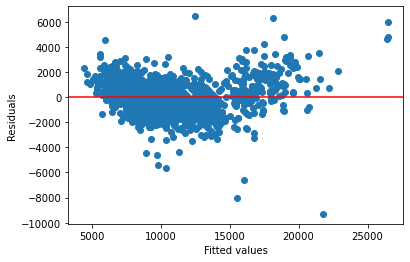

In [102]:
plt.scatter(model_toyota.fittedvalues,model_toyota.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(y=0,color='r',linestyle='-');

### Check for normality of errors or residuals -qqplot

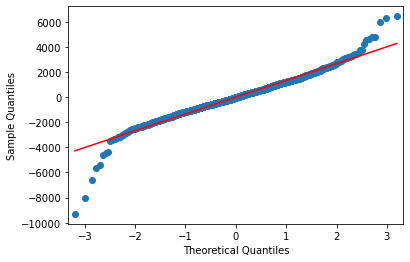

In [103]:
from statsmodels.api import qqplot
qqplot(model_toyota.resid,line='s');

In [104]:
index_no=np.where((model_toyota.resid<-4000) | (model_toyota.resid>6000))
index_no

(array([109, 146, 190, 191, 220, 392, 401, 522, 600, 653, 959], dtype=int64),)

In [105]:
df_toyota[df_toyota.index.isin(index_no[0])]

,PR,Age,km,hp,CC,DOORS,GEARS,QTax,WT
109,32500,4,1,116,2000,5,5,283,1480
146,24500,13,19988,110,1600,5,5,85,1130
190,4350,44,158320,69,1800,5,5,64,1110
191,4750,44,131273,69,1800,5,5,64,1110
220,12450,44,74172,110,1600,5,5,163,1615
392,4450,56,129155,69,1800,5,5,64,1110
401,5150,56,113997,72,2000,5,5,64,1135
522,18950,49,49568,110,1600,3,5,19,1105
600,7500,50,1,90,2000,3,5,64,1260
653,6950,65,114383,90,2000,3,5,64,1260


In [106]:
df_toyota.shape

(1435, 9)

In [107]:
df_toyota_qqplot_residual=df_toyota.drop(index_no[0],axis=0).reset_index(drop=True)

In [108]:
df_toyota_qqplot_residual.shape

(1424, 9)

In [109]:
formula='PR ~ Age+km+hp+CC+DOORS+GEARS+QTax+WT'

In [110]:
model_qqplot_toyota=ols(formula=formula,data=df_toyota_qqplot_residual).fit()

In [111]:
model_qqplot_toyota.params

Intercept   -14576.020743
Age           -114.306161
km              -0.020194
hp              19.767719
CC              -0.185527
DOORS          -83.619721
GEARS          636.246918
QTax            -5.063814
WT              27.028129
dtype: float64

In [112]:
model_qqplot_toyota.pvalues

Intercept     1.666674e-23
Age          5.889887e-292
km            2.218434e-64
hp            7.582355e-14
CC            2.216772e-02
DOORS         2.235591e-02
GEARS         3.050174e-04
QTax          1.130903e-04
WT            2.536283e-93
dtype: float64

In [113]:
model_qqplot_toyota.rsquared

0.8859785598477082

## Influence Plot - this shows which observatoins or rows which are having high influence on the models prediction

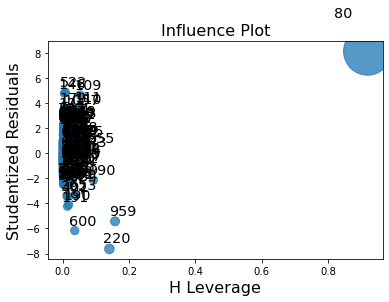

In [114]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_toyota);


In [115]:
toyota_df_Influence_plot=df_toyota.drop([80],axis=0).reset_index(drop=True)

In [116]:
toyota_df_Influence_plot.shape

(1434, 9)

In [117]:
formula='PR ~ Age+km+hp+CC+DOORS+GEARS+QTax+WT'

In [118]:
model_toyota_InfluencePlot=ols(formula=formula,data=toyota_df_Influence_plot).fit()

In [119]:
model_toyota_InfluencePlot.params

Intercept   -6197.933399
Age          -120.507430
km             -0.017799
hp             39.224550
CC             -2.508791
DOORS         -26.512930
GEARS         527.129216
QTax            8.941399
WT             20.062713
dtype: float64

In [120]:
model_toyota_InfluencePlot.pvalues

Intercept     8.123945e-06
Age          2.336818e-292
km            1.868674e-41
hp            5.123463e-39
CC            7.178158e-16
DOORS         4.993149e-01
GEARS         6.341805e-03
QTax          4.846286e-10
WT            4.509449e-65
dtype: float64

In [121]:
model_toyota_InfluencePlot.rsquared

0.8681163912634053

### Cooks Distance

In [122]:
model_influence=model_toyota.get_influence()
(c,_)=model_influence.cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

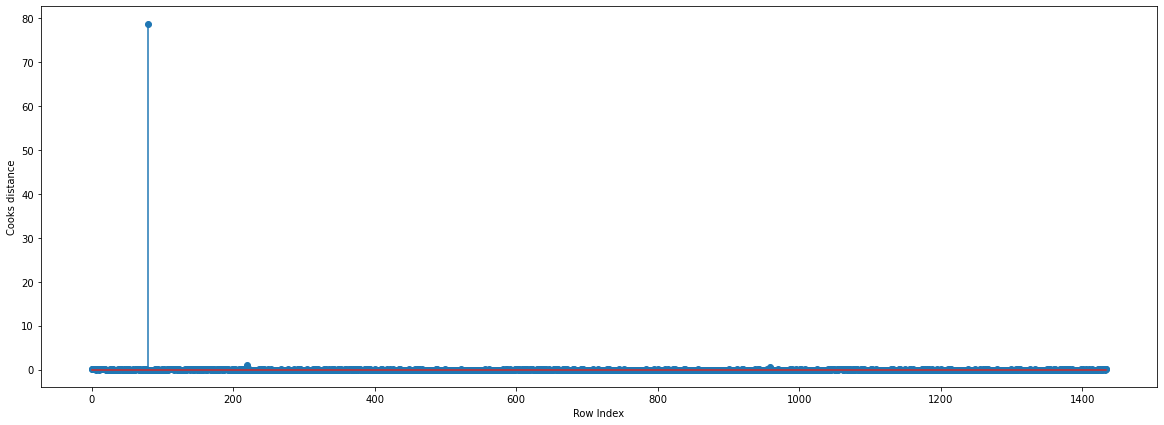

In [123]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_toyota)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks distance');

In [124]:
alpha=4/len(df_toyota)
alpha

0.0027874564459930314

In [125]:
np.where(c>alpha)[0] 

array([   0,    1,    2,    4,    5,    7,    8,   12,   13,   14,   15,
         16,   30,   49,   52,   53,   68,   74,   80,   89,   91,  109,
        110,  111,  112,  114,  118,  124,  137,  140,  146,  153,  160,
        170,  173,  177,  178,  185,  186,  188,  190,  191,  202,  208,
        220,  222,  253,  329,  378,  386,  387,  392,  401,  411,  457,
        462,  486,  522,  600,  614,  616,  653,  695,  729,  810,  912,
        959,  990, 1053, 1057, 1058, 1071, 1078, 1108, 1401, 1425, 1434],
      dtype=int64)

In [126]:
toyota_df_cooks_distance=df_toyota.drop(np.where(c>alpha)[0],axis=0).reset_index(drop=True)

In [127]:
toyota_df_cooks_distance.shape

(1358, 9)

In [128]:
formula='PR ~ Age+km+hp+CC+DOORS+GEARS+QTax+WT'

In [129]:
model_toyota_cooks_distance=ols(formula=formula,data=toyota_df_cooks_distance).fit()

In [130]:
model_toyota_cooks_distance.params

Intercept   -12157.352759
Age           -112.523238
km              -0.016606
hp              20.689125
CC              -2.596650
DOORS         -108.611390
GEARS          347.135896
QTax            -0.101121
WT              28.898969
dtype: float64

In [131]:
model_toyota_cooks_distance.pvalues

Intercept     3.898104e-16
Age          2.381668e-315
km            2.683549e-50
hp            4.076828e-12
CC            2.550334e-18
DOORS         1.292585e-03
GEARS         4.695442e-02
QTax          9.428919e-01
WT            2.292748e-85
dtype: float64

In [132]:
model_toyota_cooks_distance.rsquared

0.8924810976766351

### VIF- Variance Inflation Factor- Check for multicollinearity btw independent features

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [134]:
toyota_df_VIF=df_toyota.drop('PR',axis=1) 

In [135]:
toyota_df_VIF.head()

,Age,km,hp,CC,DOORS,GEARS,QTax,WT
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


In [136]:
toyota_df_VIF.shape

(1435, 8)

In [137]:
vif=pd.DataFrame()
vif['VIFFactor']=[variance_inflation_factor(toyota_df_VIF.values,i) for i in range(toyota_df_VIF.shape[1])]
vif['Features']=toyota_df_VIF.columns
vif

,VIFFactor,Features
0,16.392665,Age
1,7.601207,km
2,64.894446,hp
3,17.186097,CC
4,21.856114,DOORS
5,439.672599,GEARS
6,11.021647,QTax
7,543.522036,WT


### Removing hp and gears and weight as it has higher VIF values and building model

In [138]:
formula='PR ~ Age+km+CC+DOORS+QTax'

model_toyota_VIF=ols(formula=formula,data=df_toyota).fit()

In [139]:
model_toyota_VIF.params

Intercept    17858.424888
Age           -139.363485
km              -0.023602
CC               0.324425
DOORS          201.523943
QTax            11.013398
dtype: float64

In [140]:
model_toyota_VIF.pvalues

Intercept     0.000000e+00
Age          2.490379e-304
km            4.743022e-55
CC            1.784096e-03
DOORS         6.413209e-06
QTax          1.605996e-19
dtype: float64

In [141]:
model_toyota_VIF.rsquared

0.8087620773625505

## RSQUARE TABLE

In [142]:
Rsquare=pd.DataFrame()
Rsquare["Models"]=["CooksDistance","QQPlot","InfluencePlot","Default","NoOutliers","VIF"]
Rsquare["RSQUAREValue"]=[model_toyota_cooks_distance.rsquared,model_qqplot_toyota.rsquared,
                         model_toyota_InfluencePlot.rsquared,
                         model_toyota.rsquared,model_OUT.rsquared,model_toyota_VIF.rsquared]
Rsquare

,Models,RSQUAREValue
0,CooksDistance,0.892481
1,QQPlot,0.885979
2,InfluencePlot,0.868116
3,Default,0.862520
4,NoOutliers,0.843083
5,VIF,0.808762


### Model Predictions-Sample New Data

In [143]:
df_toyota.head()

,PR,Age,km,hp,CC,DOORS,GEARS,QTax,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [144]:
data=pd.DataFrame({"Age":24,"km":41711,"hp":90,"CC":2000,"DOORS":3,"GEARS":5,"QTax":210,"WT":1165},index=[0])

In [145]:
data

,Age,km,hp,CC,DOORS,GEARS,QTax,WT
0,24,41711,90,2000,3,5,210,1165


In [146]:
model_toyota.predict(data)

0    16779.63521
dtype: float64

In [147]:
model_qqplot_toyota.predict(data)

0    16601.105243
dtype: float64

In [148]:
model_toyota_cooks_distance.predict(data)

0    16174.054071
dtype: float64

In [149]:
model_toyota_InfluencePlot.predict(data)

0    16486.949796
dtype: float64

In [150]:
model_OUT.predict(data)

0    18384.052812
dtype: float64

In [151]:
model_toyota_VIF.predict(data)

0    17095.471692
dtype: float64

### RMSE Method

In [152]:
from sklearn.metrics import mean_squared_error

In [153]:
predictions_default=model_toyota.predict(df_toyota)
rmse_default=mean_squared_error(df_toyota['PR'],predictions_default,squared=False)
rmse_default

1337.5902507310752

In [154]:
predictions_qqplot=model_qqplot_toyota.predict(df_toyota_qqplot_residual)
rmse_qqplot=mean_squared_error(df_toyota_qqplot_residual['PR'],predictions_qqplot,squared=False)
rmse_qqplot

1192.7364426159018

In [155]:
predictions_influenceplot=model_toyota_InfluencePlot.predict(toyota_df_Influence_plot)
rmse_influenceplot=mean_squared_error(toyota_df_Influence_plot['PR'],predictions_influenceplot,squared=False)
rmse_influenceplot

1308.1597166877107

In [156]:
predictions_cooksdistance=model_toyota_cooks_distance.predict(toyota_df_cooks_distance)
rmse_cooksdistance=mean_squared_error(toyota_df_cooks_distance['PR'],predictions_cooksdistance,squared=False)
rmse_cooksdistance

1021.2589617282451

In [157]:
predictions_NoOutliers=model_OUT.predict(df_toyota_NOUT)
rmse_noOutliers=mean_squared_error(df_toyota_NOUT['PR'],predictions_NoOutliers,squared=False)
rmse_noOutliers

1429.021063247014

In [158]:
predictions_VIF=model_toyota_VIF.predict(df_toyota)
rmse_VIF=mean_squared_error(df_toyota['PR'],predictions_VIF,squared=False)
rmse_VIF

1577.5763327663435

In [159]:
RMSE=pd.DataFrame()
RMSE["Models"]=["CooksDistance","QQPlot","InfluencePlot","Default","NoOutliers","VIF"]
RMSE["RMSEValues"]=[rmse_cooksdistance,rmse_qqplot,rmse_influenceplot,rmse_default,rmse_noOutliers,rmse_VIF]
RMSE

,Models,RMSEValues
0,CooksDistance,1021.258962
1,QQPlot,1192.736443
2,InfluencePlot,1308.159717
3,Default,1337.590251
4,NoOutliers,1429.021063
5,VIF,1577.576333


### So the best model to choose is the Cooks Distance model without any transformations since it is able to predict that target varaible more closely and it has least RMSE value compared to others and it is able to explain 89.24% of the variability in the Target variable by the independent variables.